# 4
Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [41]:
from scipy import stats
from scipy.stats import norm
import numpy as np
import pandas as pd

In [9]:
z=(9.57-9.5)/(0.4/np.sqrt(160))
p=2*(1-norm.cdf(abs(z),0,1))

In [10]:
round(p,4)

0.0269

# 6

Имеются данные о стоимости и размерах 53940 бриллиантов:
diamonds.txt

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

    линейную регрессию с помощью LinearRegression без параметров
    случайный лес из 10 деревьев с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05\alpha=0.05α=0.05?

In [25]:
from sklearn.model_selection import train_test_split
df=pd.read_table('diamonds.txt')
y=df.iloc[:,3]
X=df.drop('price',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [61]:
regr1=LinearRegression().fit(X_train,y_train)
pred1=regr1.predict(X_test)
error1=metrics.mean_absolute_error(y_test, pred1) 
errors1=abs(y_test-pred1)
error1

890.3764004285612

In [62]:
regr2=RandomForestRegressor(n_estimators=10,random_state=1).fit(X_train,y_train)
pred2=regr2.predict(X_test)
error2=metrics.mean_absolute_error(y_test, pred2) 
errors2=abs(y_test-pred2)
error2

802.9205172724115

# Т.к выборки зависимые


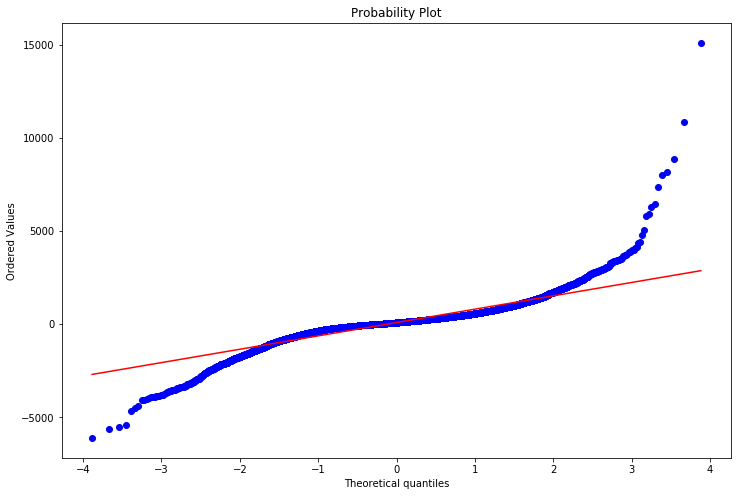

In [63]:
from matplotlib import pylab
pylab.figure(figsize=(12,8))
stats.probplot(errors1-errors2, dist="norm", plot=pylab)
pylab.show()

In [64]:
stats.shapiro(errors1-errors2)


/home/eketerina753/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8444936871528625, 0.0)

=> не распределено нормально

Критерий Стьюдента:

$H_0\colon$ средние значения равны

$H_1\colon$ не одинаковы.

In [65]:
stats.ttest_rel(errors1, errors2)

Ttest_relResult(statistic=13.017729783878696, pvalue=1.655174575138418e-38)

=>$H_0\colon$ отвергается в пользу того, что средние значения для регрессоров разные

# 7

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

#### t-интервал
Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [77]:
from statsmodels.stats.weightstats import  _tconfint_generic

In [83]:
_tconfint_generic((abs(errors1)-abs(errors2)).mean(),(abs(errors1)-abs(errors2)).std(ddof=1)/np.sqrt(len(errors1)),len(errors1)-1,0.05, 'two-sided')

(74.28724532595558, 100.62452098634407)

=> ошибка случайного леса меньше